## Import dependencies

In [1]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

11501568/11490434 [==============================] - 0s 0us/step


## Plot some samples of the dataset

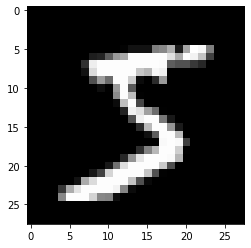

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [3]:
x_train[0].shape

(28, 28)

## Create the autoencoder

In [6]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

## Create the encoder model
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

In [8]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

In [9]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 784)               50960     
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 105,360
Trainable params: 105,360
Non-tra

## Define the optimizer

In [7]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Train the autoencoder

In [10]:
autoencoder.compile(opt, loss='mse')
epochs=3

for epoch in range(epochs):
    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 7s 4ms/step - loss: 0.0215 - val_loss: 0.0151
INFO:tensorflow:Assets written to: models/AE-1.model/assets
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0143 - val_loss: 0.0135
INFO:tensorflow:Assets written to: models/AE-2.model/assets
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0131 - val_loss: 0.0126
INFO:tensorflow:Assets written to: models/AE-3.model/assets


## Test the autoencoder

(64,)
[1.6143329  1.6453903  1.9837688  0.37934855 0.60555756 2.2710364
 1.2727194  0.47229755 0.         2.4280581  2.3524067  0.8160464
 0.18313621 0.         1.512673   1.0591322  1.1620226  1.3688896
 0.         1.1368082  0.         1.8906951  1.0268162  0.71982914
 2.5591443  0.         0.8689327  0.9254041  2.5209846  1.7686884
 0.9477802  2.963418   0.         2.122848   2.205802   0.99097514
 0.9694947  1.2806231  2.861016   0.         1.5664648  0.
 0.33104008 2.1451633  1.8654721  1.7064793  1.2264721  2.1468613
 1.869295   1.417742   1.4171693  1.7830098  1.333997   1.0841647
 1.3852684  1.9081368  0.7239005  1.4323795  1.2296157  1.227638
 1.7574728  1.2538607  3.316257   1.9445275 ]


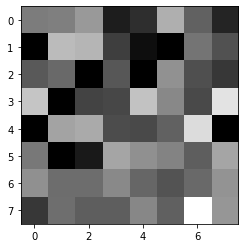

In [11]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
print(example[0].shape)
print(example[0])
plt.imshow(example[0].reshape((8,8)), cmap="gray")

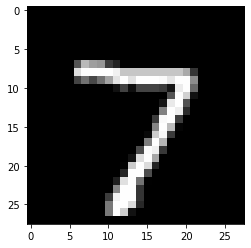

In [12]:
plt.imshow(x_test[0], cmap="gray")

(28, 28)


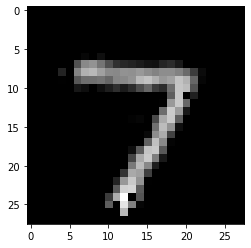

In [13]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
print(np.squeeze(img).shape)
plt.imshow(np.squeeze(img), cmap="gray")